In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Final_data_with_score.csv")

In [4]:
df.head()

,Unnamed: 0,book_name,book_ratings,book_number_of_reviews,book_price,book_discount,book_author,years_launched,keyword2,Book_score
0,0,Python 3 Object-Oriented Programming: Build ro...,4.4,201,4770,0,by Dusty Phillips,4,['python'],85.0
1,1,Learning RStudio for R Statistical Computing,3.7,13,1828,0,by Mark van der Loo and Edwin de Jonge,10,['rstudio'],60.0
2,2,Socket.io Real-time Web Application Development,3.2,4,2243,0,by Rohit Rai,9,['socket'],50.0
3,3,eZ Publish 4: Enterprise Web Sites Step-by-Step,1.0,1,220,0,by Francesco Trucchia and Francesco Fullone,13,['publish'],20.0
4,4,Robot Framework Test Automation,2.9,17,1828,0,by Sumit Bisht,9,['automation'],55.0


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

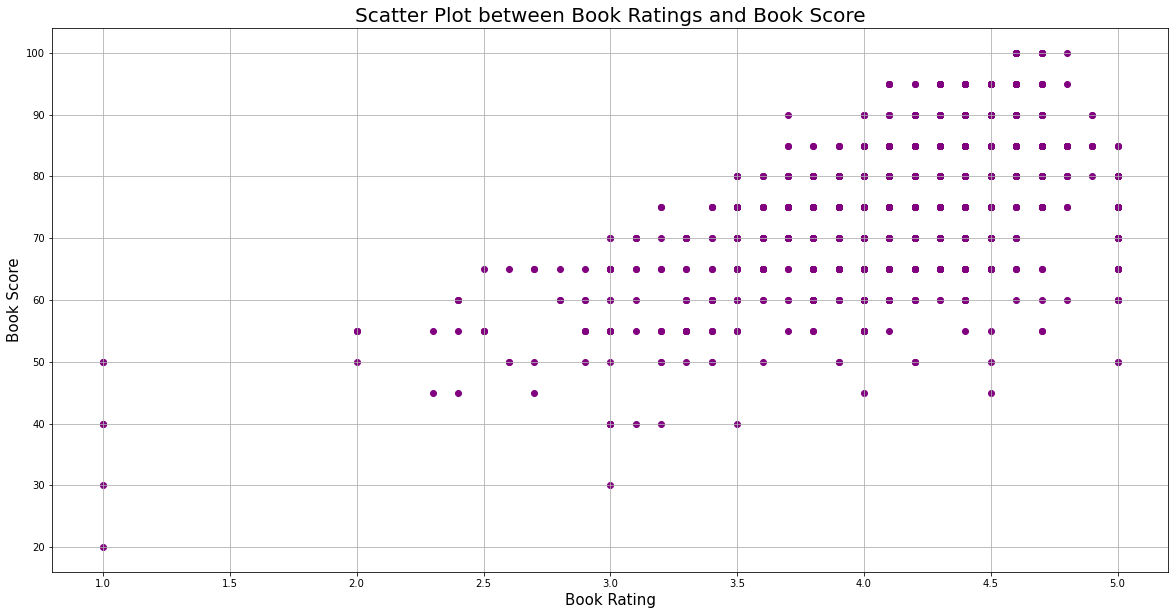

In [6]:
plt.figure(figsize=(20,10))
plt.scatter(df['book_ratings'], df['Book_score'], color="purple")
plt.xlabel('Book Rating', size=15)
plt.ylabel('Book Score', size=15)
plt.title("Scatter Plot between Book Ratings and Book Score", size=20)
plt.grid()

- This scatter plot clearly shows that the book ratings are directly proportional to the book score, higher the rating, higher the book score.

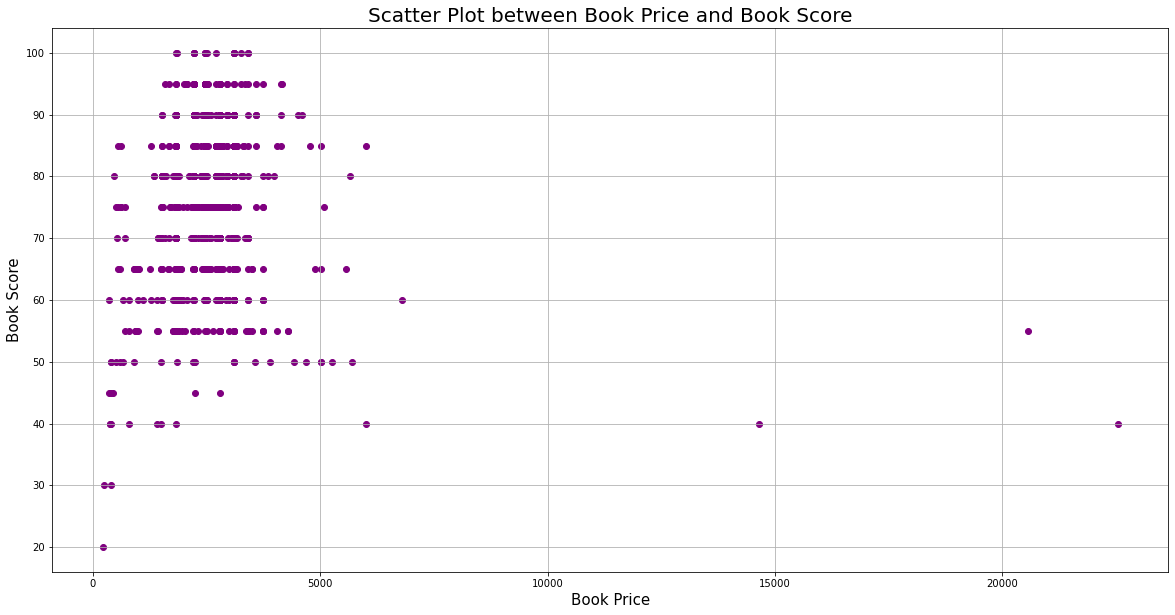

In [7]:
plt.figure(figsize=(20,10))
plt.scatter(df['book_price'], df['Book_score'], color="purple")
plt.xlabel('Book Price', size=15)
plt.ylabel('Book Score', size=15)
plt.title("Scatter Plot between Book Price and Book Score", size=20)
plt.grid()

- The book price and book score are inversely proportional to each other; higher the book price, lower the book score.

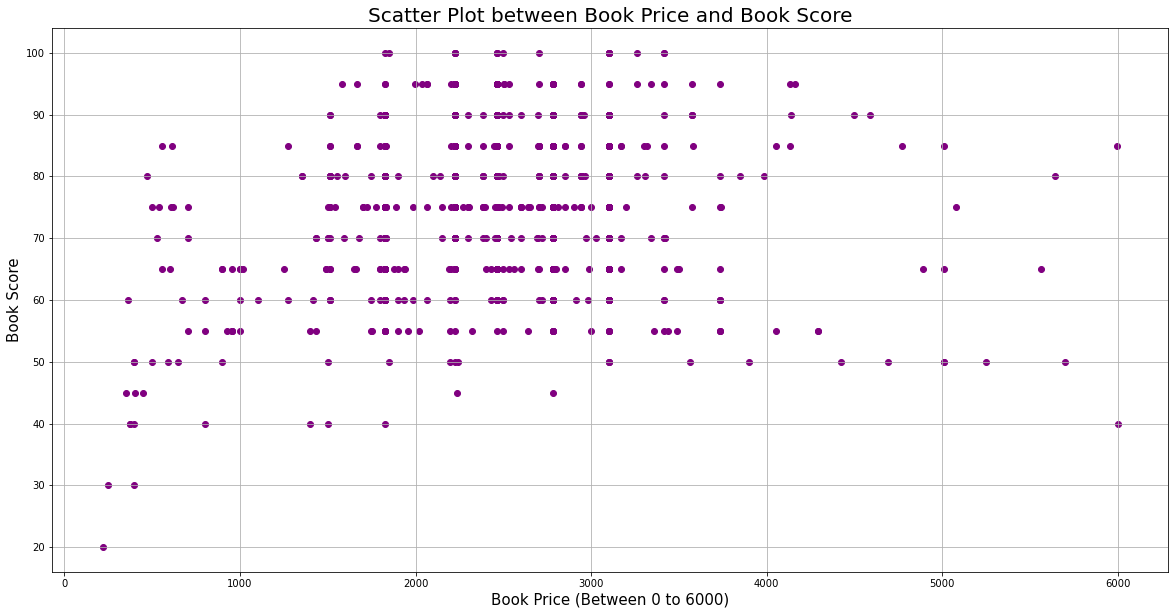

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(df['book_price'][df['book_price'] < 6000], df['Book_score'][df['book_price'] < 6000], color="purple")
plt.xlabel('Book Price (Between 0 to 6000)', size=15)
plt.ylabel('Book Score', size=15)
plt.title("Scatter Plot between Book Price and Book Score", size=20)
plt.grid()

- The scatter plot between book prices and book score reflects that the books in the price range of Rs. 2000-3000 tend to have a higher book score compared to the other price ranges.

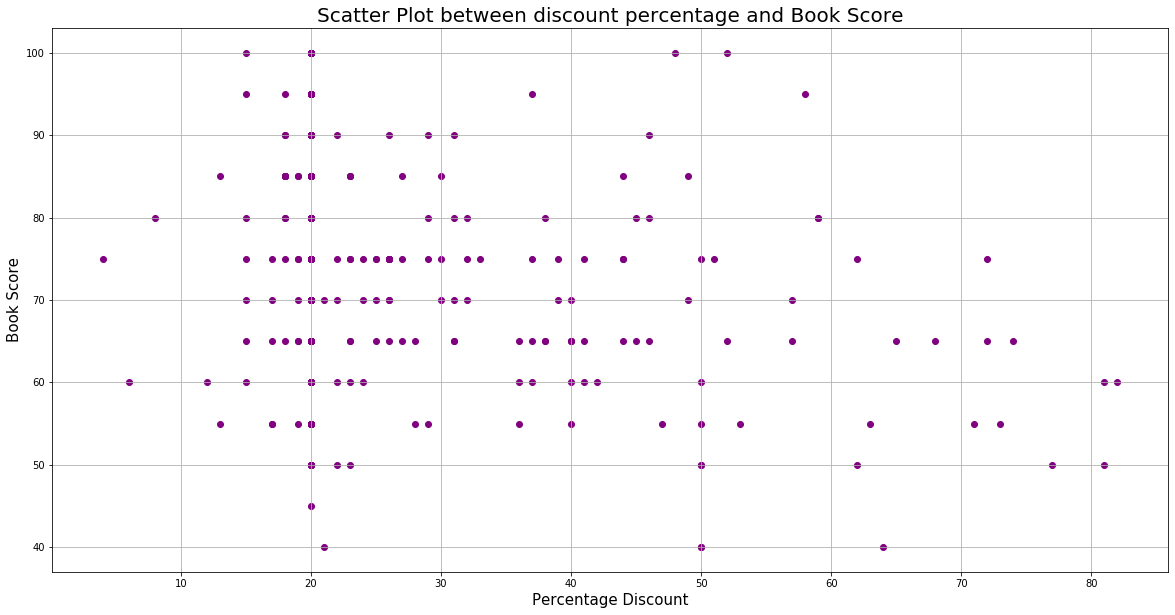

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(df['book_discount'][df['book_discount']!=0], df['Book_score'][df['book_discount']!=0], color="purple")
plt.xlabel('Percentage Discount', size=15)
plt.ylabel('Book Score', size=15)
plt.title("Scatter Plot between discount percentage and Book Score", size=20)
plt.grid()

- There does not seem to be a clear relationship between the book score and discount offered on that book.

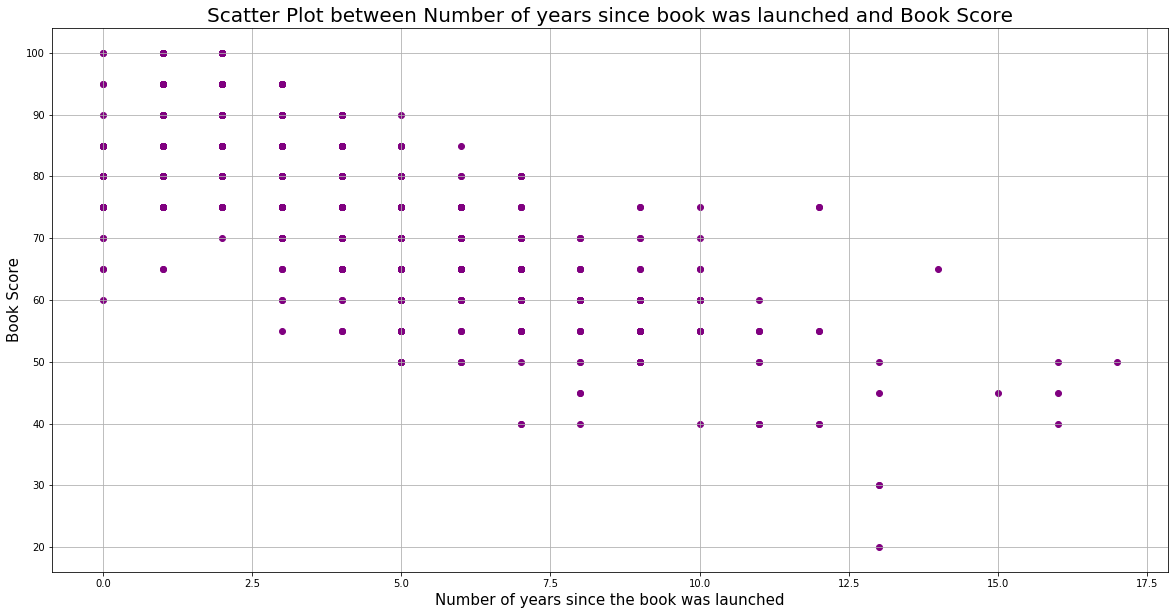

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(df['years_launched'], df['Book_score'][df['Book_score'] <= 6000], color="purple")
plt.xlabel('Number of years since the book was launched', size=15)
plt.ylabel('Book Score', size=15)
plt.title("Scatter Plot between Number of years since book was launched and Book Score", size=20)
plt.grid()

- The above scatter plot between number of years since the book is released and the book score reflects an inversely proportional relationship between the two entities.

Text(0.5, 1.0, 'Frequency Distribution of Book Score')

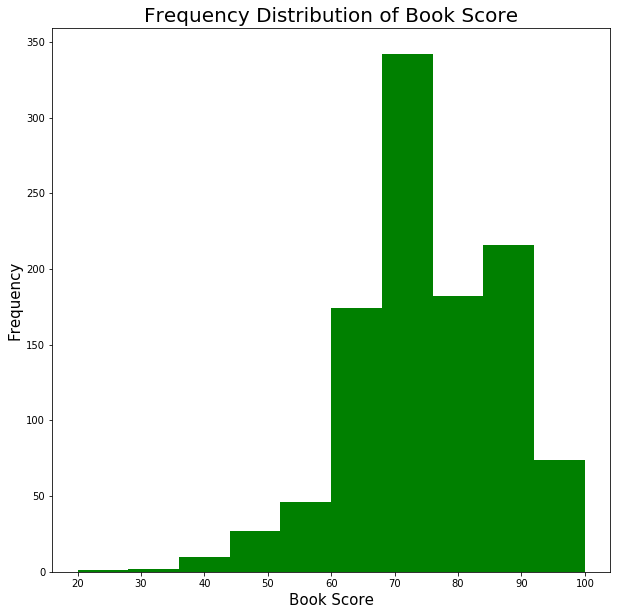

In [16]:
plt.figure(figsize=(10, 10))
plt.hist(df['Book_score'], color='green')
plt.xlabel("Book Score", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Frequency Distribution of Book Score", size=20)

- Most of the books have a score between 70-75, followed by 85-90 and 75-80, which is closely chased by 65-70.

In [19]:
# Binning the Price column

df['price_bins'] = pd.cut(df['book_price'], bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000])

df_price = pd.DataFrame(columns = ['Price Bin', 'Average Score'])
df_price['Price Bin'] = df['price_bins'].unique()

avg_scores = []
for element in df_price['Price Bin']:
    df_of_that_bin = df[df['price_bins'] == element]
    try:
        avg_scores.append(sum(df_of_that_bin['Book_score'])/len(df_of_that_bin['Book_score']))
    except:
        avg_scores.append(0)

df_price['Average Score'] = avg_scores

Text(0.5, 1.0, 'Average Score for each Price range')

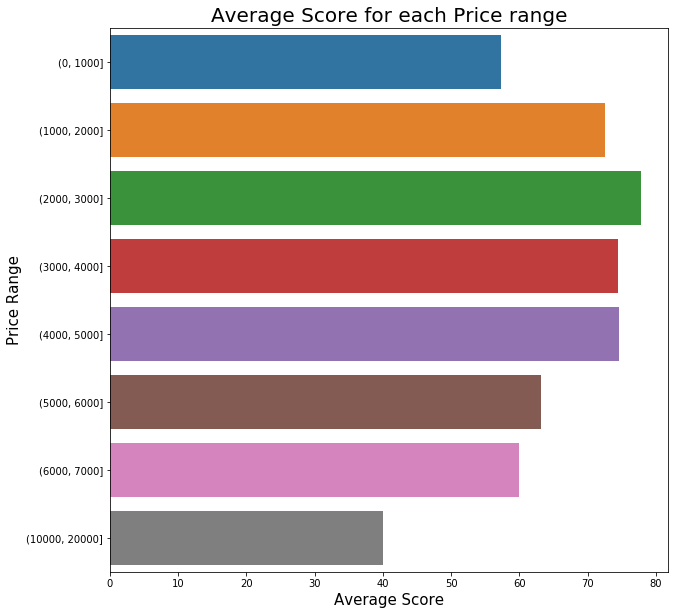

In [20]:
plt.figure(figsize=(10, 10))
sns.barplot(x = df_price['Average Score'], y=df_price['Price Bin'], orient='h')
plt.xlabel("Average Score"b, size=15)
plt.ylabel("Price Range", size=15)
plt.title("Average Score for each Price range", size=20)

###### The average book score of price ranges is shown in the graph above.
- The average book score of books priced between Rs. 2000-3000 is higher than the rest of the price brackets.
- Books priced above Rs. 5000 tend to have low book scores.

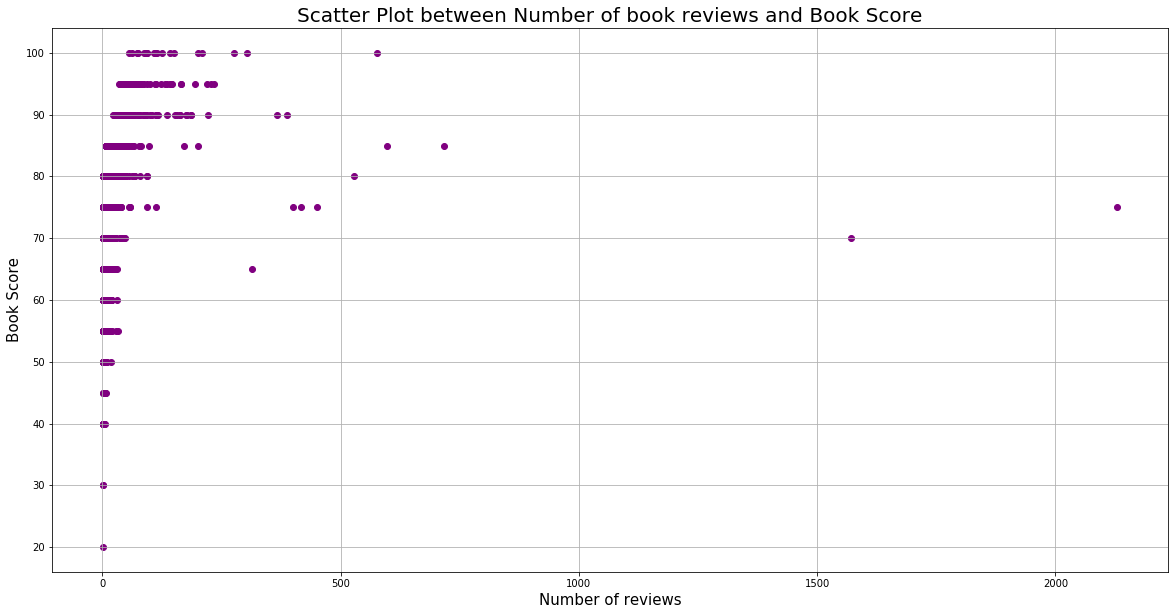

In [22]:
plt.figure(figsize=(20,10))
plt.scatter(df['book_number_of_reviews'], df['Book_score'], color="purple")
plt.xlabel('Number of reviews', size=15)
plt.ylabel('Book Score', size=15)
plt.title("Scatter Plot between Number of book reviews and Book Score", size=20)
plt.grid()

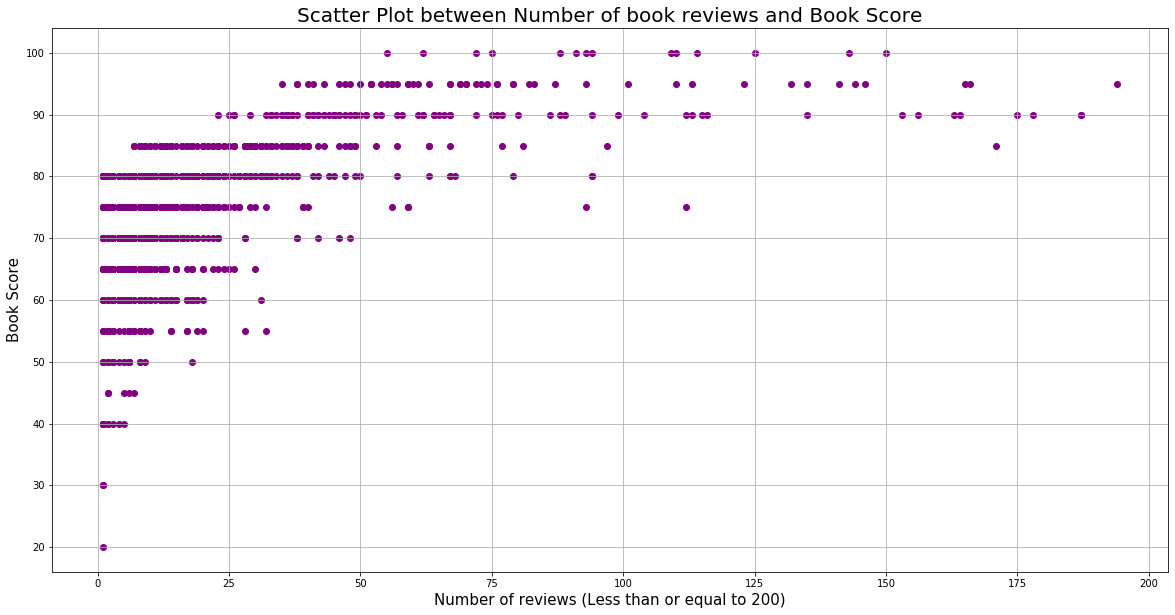

In [29]:
plt.figure(figsize=(20,10))
plt.scatter(df['book_number_of_reviews'][df['book_number_of_reviews'] <= 200], df['Book_score'][df['book_number_of_reviews'] <= 200], color="purple")
plt.xlabel('Number of reviews (Less than or equal to 200)', size=15)
plt.ylabel('Book Score', size=15)
plt.title("Scatter Plot between Number of book reviews and Book Score", size=20)
plt.grid()

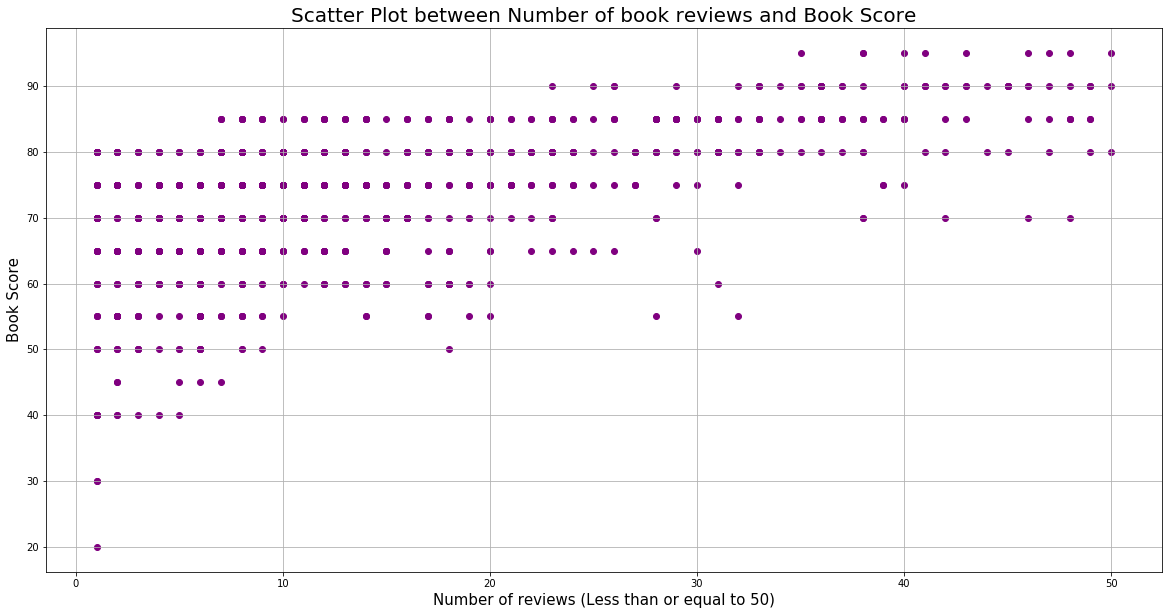

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(df['book_number_of_reviews'][df['book_number_of_reviews'] <= 50], df['Book_score'][df['book_number_of_reviews'] <= 50], color="purple")
plt.xlabel('Number of reviews (Less than or equal to 50)', size=15)
plt.ylabel('Book Score', size=15)
plt.title("Scatter Plot between Number of book reviews and Book Score", size=20)
plt.grid()

- Books that have been reviewed more tend to have a higher book score.

## Conclusions

- Book ratings and book score are directly proportional to each other.
- Book price and book score are inversely proportional to each other.
- Books priced between **Rs. 2000-3000** have a higher book score than the other books.
- There is no relationship between the book score and discount applicable on it.
- Book score is inversely proportional to the number of years since the book is released.
- Most of the books have a book score between **70-75.**
- Books priced **above Rs. 5000** have a less book scores, and thus, can be considered **overprized**.
- The number of reviews on a book is **directly proportional** to their respective book scores.